2017 : 구글 시퀀스 모델링을 위한 새로운 신경망
  - 기계번역에서 RNN을 능가
  - GPT
  - BERT

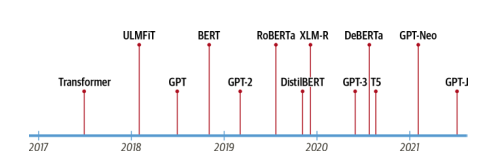

In [1]:
# 기초개념
# 인코더-디코더, 어텐션 매커니즘, 전이학습
# 허깅페이스 라이브러리

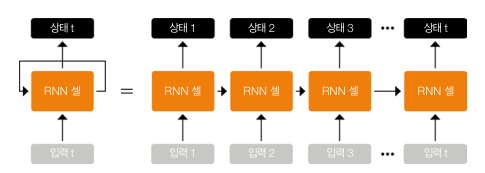

In [2]:
# RNN : 시퀀스를 한 언어에서 다른 언어로 매핑하는 기계번역 시스템
# 인코더-디코더, 시퀀스 투 시퀀스

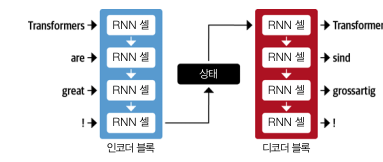

In [3]:
# 이 구조는 인코더의 마지막 은닉상태가 정보병목이 된다는 약점
# 마지막 상태를 가지고 디코더가 문장을 만들기 때문에 마지막상태는 모든 시퀀스를 포함 -> 시작 정보가 손실가능성이  있다
# 디코더가 모든 은닉상태에 접근해서 병목현상을 제거-> 어텐션 매커니즘

In [4]:
# 어텐션은 입력 시퀀스에서 은닉상태를 만들지 않고 스텝마다 인코더에서 디코더가 참고할 은닉상태를 출력 한다는 기본 개념

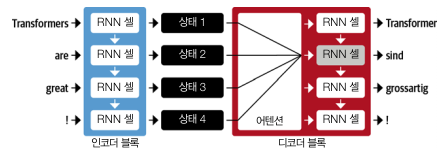

In [5]:
# 디코더가 모든 디코딩 타임스텝마다 인코더의 각 상태에 다른 가중치 또는 어텐션을 할당
# 태생적으로 계산이 순차적으로 이루어져서 입력 시퀀스 전체에 걸처 병렬화 할 수 없다
# 패러다음 변화, 순환을모두 없애고 셀프어텐션이라는 특별한형태의 어텐션

In [6]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [7]:
# 모든 단계를 추상화 할수 있는 파이프라인을 사용

In [8]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.3 MB/s eta 0:00:00


In [9]:
from transformers import pipeline

In [10]:
# pipeline함수를 통해 관심작업에 대한 파이프라인 객체를 생성
classifier =  pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [11]:
# 자동으로 허깅페이스제 접속해서 모델의 가중치를 다운로드
# 파이프라인을 다시 다운로드하면 ... 캐싱된 정보를 사용한다고 안내....
# text-classification  감성분석 -> 다중분류, 다중레이블 분류도 지원

In [12]:
# 텍스를 입력-->예측 리스트반환
outputs = classifier(text)
import pandas as pd
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


In [13]:
# 텍스트에서 개체명을 인식하는 작업
# 피드백이 특정 제품과 서비스중 무엇에 대한?
# NLP에서는 제품,장소, 사람같은 실제 객체를 개체명(named entry)
# 개체명을 텍스트에서 추출하는 작업 개체명 인식(NER)

In [14]:
ner_tagger = pipeline("ner",aggregation_strategy='simple')
outputs =  ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


In [15]:
# 구체적인 질문-> 질문답변(question answering)

In [16]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [17]:
# 답변을 텍스트에서 직접추출  extractive question answering 추출적 질문 답변
# 불평이 산더미처럼 쌓여서 전부 못 읽을때....
# 텍스 요약
# 긴 텍스트를 입력받아서 사실이 모두 포함된 간단한 버전을 만드는 작업

In [18]:
summarizer =  pipeline("summarization")
outputs = summarizer(text, max_length=60 , clean_up_tokenization_spaces=True)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [19]:
outputs[0]['summary_text']

' Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand'

In [20]:
help(pipeline)

Help on function pipeline in module transformers.pipelines:

pipeline(task: str = None, model: Union[str, ForwardRef('PreTrainedModel'), ForwardRef('TFPreTrainedModel'), NoneType] = None, config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None, tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None, feature_extractor: Union[str, ForwardRef('SequenceFeatureExtractor'), NoneType] = None, image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None, framework: Optional[str] = None, revision: Optional[str] = None, use_fast: bool = True, token: Union[str, bool, NoneType] = None, device: Union[int, str, ForwardRef('torch.device'), NoneType] = None, device_map=None, torch_dtype=None, trust_remote_code: Optional[bool] = None, model_kwargs: Dict[str, Any] = None, pipeline_class: Optional[Any] = None, **kwargs) -> transformers.pipelines.base.Pipeline


In [21]:
!pip install sentencepiece  # 런타임 다시 시작

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.9 MB/s eta 0:00:00


In [22]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [24]:
# 번역
translator = pipeline("translation_en_to_de",
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

ValueError: ignored

In [ ]:
outpusts[0]['translation_text']

In [25]:
from transformers import pipeline
translator = pipeline('translation', model='chunwoolee0/ke_t5_base_bongsoo_en_ko')
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=400)
outputs

Your input_length: 116 is bigger than 0.9 * max_length: 20. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1285: UserWarning: Unfeasible length constraints: `min_length` (400) is larger than the maximum possible length (20). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length. Note that `max_length` is set to 20, its default value.
  warnings.warn(


[{'translation_text': '지난주 독일 내 온라인 매장에서 어벤져스의 액션 이미지를 주문했는데, 그 패키지를 열어보니 ‘마'}]

In [26]:
# 텍스트 생성
# 자동완성기능으로 고객에게 빠르게 피드백
generator = pipeline('text-generation')
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up"
prompt = text + "\n\nCustomer service response:\n" + response

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [27]:
print(prompt)

Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up


In [28]:
outputs = generator(prompt,max_length=200)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [29]:
print(outputs[0]['generated_text'])

Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up between my order for a Optimus Prime action figure to be shipped to the US, and Amazon.com ordering an action figure for Germany. It is important for me to ask what this means for your business. As a business owner I understand that when I order a toy, I am only shipping the figure to the US. Therefore I am concerned


In [30]:
# 허깅페이스 생태계


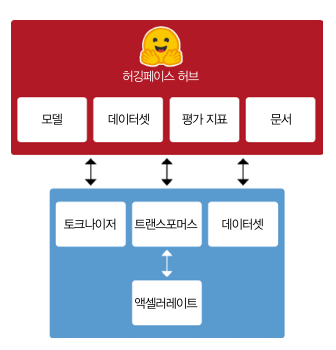


In [ ]:
# 감성분석
# 테슬라에서 차량모양이 있는 트위터 사진을공유 그 반응을 분석, 감정상태를 자동으로 인식하는 시스템을 만든다
# BERT 의 한종류인 DistilBERT모델  작고 가볍다는 장점, 대규모모델을 훈련 사전훈련된모델에서 체크포인트(checkpoint)변경

In [ ]:
# 체크포인트 : 트랜스포머 아키텍처로 로드되는 일련의가중치
# 데이터셋->토크나이저->트랜스포머스->데이터셋

In [31]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00


In [32]:
from datasets import list_datasets

In [33]:
all_datasets = list_datasets()
len(all_datasets), all_datasets[:10]

<ipython-input-33-ee25709861b7>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


(74292,
 ['acronym_identification',
  'ade_corpus_v2',
  'adversarial_qa',
  'aeslc',
  'afrikaans_ner_corpus',
  'ag_news',
  'ai2_arc',
  'air_dialogue',
  'ajgt_twitter_ar',
  'allegro_reviews'])

In [34]:
from datasets import load_dataset
emotioins = load_dataset("emotion")
emotioins

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [35]:
train_ds = emotioins['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [36]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [37]:
train_ds.column_names

['text', 'label']

In [38]:
# 트윗과 감정

In [39]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [40]:
# train_ds의 데이터 타입은 아파치 애로우(Aparch Arrow)를 기반--> 파이썬보다 훨씬더 메모리를효율적으로 관리

In [41]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [42]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [43]:
# 데이터셋->데이터프레임
emotioins.set_format(type="pandas")
df = emotioins['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [44]:
# emotioins['train'].features['label'].int2str(1)
df['label_name'] = df['label'].apply(lambda x : emotioins['train'].features['label'].int2str(x))

In [45]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [46]:
# 클래스의 분포를 확인.. 편향된 데이터셋은 균형잡힌 데이터와 다른 처리법

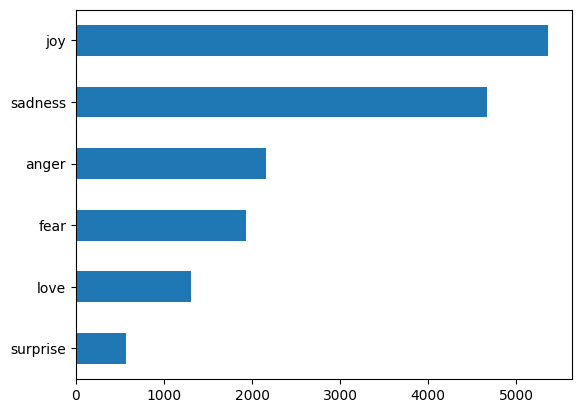

In [47]:
# 시각화를 통해서 빠르게 알아봅시다
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.show()

In [48]:
# 불균형 데이터
# 오버샘플링 : 소스클래스를 랜덤하게 오버샘플
# 언더샘플링 : 다수클래스를 랜덤하게 언더샘플
# 더 많이 수집
# https://imbalanced-learn.org/stable/

In [49]:
# 트랜스퍼모델 : 최대 문맥크기(maximum context size)
# DistilBERT 512토큰  토큰=단어

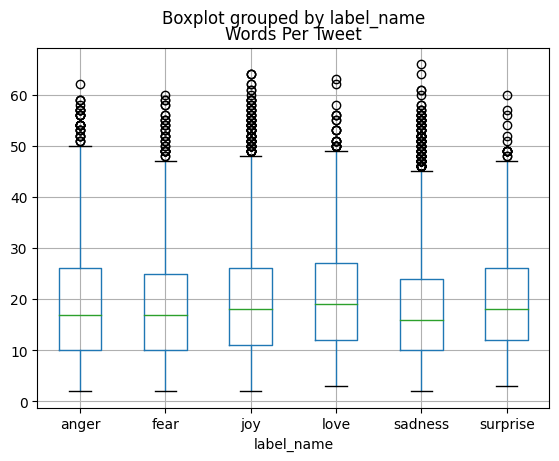

In [50]:
# 트윗당 단어의 분포
# df['text'].apply(lambda x : len(x.split()))
df['Words Per Tweet'] =  df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet",by='label_name')
plt.show()

In [51]:
# 원시데이터의 포멧을 초기화
emotioins.reset_format()

In [52]:
# 텍스트에서 토큰으로
# 토큰화 전략.  문자 토근화, 단어 토큰화에대해서 알아보고
# DistilBERT에서 사용하는 토크나이저

In [53]:
# 문자토큰화
text = "Tokenizing text is a core task of NLP"
tokenizer_text = list(text)
print(tokenizer_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [54]:
# 수치화
token2idx = {ch:idx for idx, ch in enumerate( sorted(set(tokenizer_text)) )}
print(token2idx)

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'f': 8, 'g': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17, 'z': 18}


In [55]:
# 이걸 가지고 어휘사전(vocabray) 에 있는 문자를 정수로 바꾸는 매핑 딕셔너리
input_ids = [token2idx[token] for token in tokenizer_text]
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


In [59]:
# input_ids를 웟핫으로 변경
# 파이토치로 텐서로변경한다음 ont_hot()함수를 이용해서 원-핫인코딩
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids,num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([37, 19])

In [ ]:
one_hot_encodings

In [64]:
input_ids[0],one_hot_encodings[0]

(tensor(4), tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [65]:
# 문자수준의 토큰화는 텍스트의 구조를 무시하고 전체문자열을 문자 스트림으로 처리
# 철자 오류나 희귀한단어를 처리하는데 유리,  - 이런 문자수준의 토큰화는 거의 사용안함
# 단어토큰화 : 텍스트의 일부 구조가 유지되는 방법

In [67]:
# 가장 간단한 단어토큰화는 공백을 사용해서 분리 split
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']

In [68]:
# 각 단어를 하나의 id에 매핑-->문제점 : 구두점이 고려되지 않아서 NLP .이 하나의 토큰으로 처리
# 어휘사전을 도입해서.. 구분.. 어휘사전에 없는 단어 UNK(unknown)으로 분리
# 문자토큰화와 단어토큰화의 절충안... 부분단어 토큰화(subword tokenization)

In [69]:
# 트랜스포머 사전훈련된 모델에 연관된 토크나이져 빠르게 로드하는 AutoTokenizer

In [124]:
# 자동로드
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)  # 이 방법은 빠르게 로드....

In [73]:
# 수동 로드
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [125]:
# 토크나이저 동작확인
encoded_text =  tokenizer(text)
encoded_text

{'input_ids': [101, 2023, 2003, 1037, 3231, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [126]:
# 다시 토큰으로변환
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(text),print(tokens)

this is a test
['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']


(None, None)

In [127]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] this is a test [SEP]


In [128]:
tokenizer.vocab_size

30522

In [129]:
# 최대 문맥의 길이
tokenizer.model_max_length

512

In [130]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [131]:
# 전체데이터셋 토큰화 하기
# 토큰화 함수 --- DatasetDict 객체 map()에 적용할 함수
def tokenize(batch):
  return tokenizer(batch['text'],padding=True,truncation=True)
# padding=True  배치데이터중에서 가장 긴 샘플크기에 맞춰샘플을 0으로 패딩
# truncation=True 모델의 최대문맥 크기에 맞춰서 샘플을 잘나냄

In [132]:
emotioins['train'][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [133]:
print(tokenize(emotioins['train'][:2]))

# {'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  # [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040,
  #  14977, 1998, 2003, 8300, 102]],
  #  'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  #   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


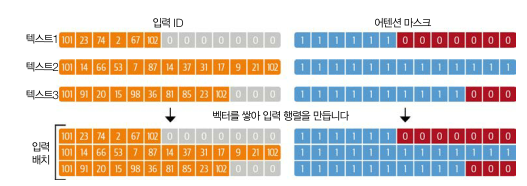

In [134]:
emotions_encoded =  emotioins.map(tokenize,batched=True, batch_size=None)
# batch_size=None 전체 데이터셋이 하나의 배치로 tokenize()함수에 적용

In [135]:
# 'input_ids', 'attention_mask' 두개가 새롭게 생성
emotions_encoded['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [136]:
# 텍스트 분류 모델 훈련
# DistilBERT는 인코딩기반의 모델  그 모델 구조는 다음과 같다

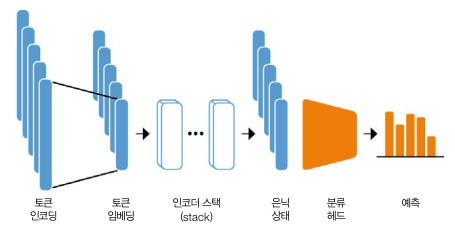

In [137]:
# 특성 추출
# 사전 훈련된 모델을 수정하지 않고 은닉상태 특성으로  사용해분류 모델을 훈련

# 미세 튜닝
# 사전 훈련된 모델의 파라메터도 업데이트하기 위해 전체 모델을 엔드- 투 - 엔드로 훈련

In [138]:
# 트랜스포머를 특성 추출기로 사용

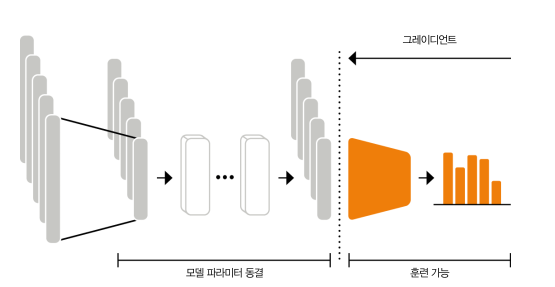

In [139]:
# 훈련하는동안 바디의 가중치를 동결하고 은닉상태를 분류모델의 특성으로 사용
# 작거나 얕은모델을 빠르게 훈련한다는 장점
# 이때 훈련되는 모델은  신경망 분류층이거나 랜덤포레스트같이 그레이디언트에 의존하지 않는 기법
# 은닉상태를 한번만 미리 계산하면 되므로 gpu를 사용하지 못할때 특히 편리

In [150]:
# 트랜스포머의 자동 클래스중에 하나인 AutoModel을 사용
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [141]:
# 마지막 은닉상태 추출
# 문자열을 인코딩하고 토큰을 파이토치 텐서로 변환
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(inputs['input_ids'].size())  #[batch_size, n_tokens]
# 인코딩을 텐서로 준비완료   모델에 있는 장치로 옮겨서 입력으로 전달
inputs = {k:v.to(device) for k, v in inputs.items()}
print(inputs)

with torch.no_grad():
  outputs = model(**inputs)
print(outputs)  # 마지막 은닉상태 한개를 반한

torch.Size([1, 6])
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [142]:
print(outputs.last_hidden_state.size())  # [batch_size, n_tokens, hidden_dim]
# 분류작업 [CLS]토큰에 연관되 은닉상태를 입력 특성으로 사용

torch.Size([1, 6, 768])


In [143]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [155]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names }
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {'hidden_state' :  last_hidden_state[:,0].cpu().numpy()}

In [156]:
# 모델은 텐서가 입력되기를 희망  torch 포멧으로 변경
emotions_encoded.set_format("torch", columns=['input_ids','attention_mask','label'])

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]